# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import Lasso

poblacion = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

poblacion.to_csv('../data/raw/Demographic_Health_Data.csv')

poblacion.shape

(3140, 108)

In [3]:
poblacion.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
poblacion.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [6]:
valores_nulos = poblacion.isnull().sum()
valores_nulos[valores_nulos>0]

Series([], dtype: int64)

No existen valores nulos en nuestro dataset

In [7]:
pd.set_option('display.max_columns', None) # Este comando hace que se impriman todas las columnas del dataset sin truncar la tabla
poblacion

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

Eliminamos varias columans del dataset que no añaden nueva información a la muestra y duplican la información, como por ejemplo las columnas de porcentajes de las poblaciones

In [8]:
poblacion_dropped = poblacion.drop(['fips', '0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018',
                                    '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', 'GQ_ESTIMATES_2018',
                                    '80+ y/o % of total pop', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', 'Two or more races pop',
                                    '% Two or more races', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18',
                                    "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18",
                                    'POVALL_2018','PCTPOV517_2018', 'Civilian_labor_force_2018', 'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Total Population',
                                    'Population Aged 60+', 'Percent of Population Aged 60+', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18 and older', 'anycondition_prevalence',
                                    'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
                                    'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
                                    'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence',
                                    'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'Urban_rural_code'], axis = 1)


poblacion_dropped.shape

(3140, 54)

In [9]:
poblacion_dropped.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,COUNTY_NAME,STATE_NAME,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,13.8,19.3,59338,53628,65048,25015,942,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,Autauga,Alabama,20181,15193,3345,3644,5462,1326
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.8,13.9,57588,54437,60739,90456,3393,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,Baldwin,Alabama,68790,50761,13414,14692,20520,5479
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,30.9,43.9,34382,31157,37607,7940,433,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,Barbour,Alabama,11325,8013,2159,2373,3870,887
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,21.8,27.8,46064,41283,50845,8317,344,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,Bibb,Alabama,9190,6894,1533,1789,2511,595
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,13.2,18.0,50412,46157,54667,24128,878,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,Blount,Alabama,20584,15112,4101,4661,6017,1507


In [10]:
poblacion_dropped.describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,7.965979e+04,1.395026e+04,1320.231210,6.155618e+03,254.561783,11.167739,10.365287,0.802229,1.111529,0.004108,1.116433,8.581987e+03,1.887329e+04,2.017919e+04,2.193144e+04,15.159459,21.106911,52767.083758,48594.546178,56939.621338,4.947048e+04,2005.100318,52767.083758,254.923567,226.159013,87.958758,80.074045,7.621943,6.775159,52.698009,28.215940,1.655299,62.898806,44.393892,167.332629,23.817516,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,2.372880e+05,5.899787e+04,5362.395724,4.388798e+04,2192.079705,2.522839,2.687543,4.056710,2.166349,11.450288,11.385537,3.723815e+04,5.082858e+04,6.086391e+04,7.977484e+04,6.131874,8.909328,13907.992668,13597.996280,14323.366838,1.619570e+05,6971.115396,13907.992668,42.291759,31.542980,12.568023,10.487697,1.288832,1.126812,153.878850,86.409281,4.293436,214.737693,133.348667,543.035916,84.602028,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-14.400000,-3.900000,-62.300000,-62.100000,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,191.300000,174.800000,65.300000,61.200000,5.600000,5.000000,0.025524,0.009726,0.001363,0.046773,0.030356,0.111759,0.000000,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,9.008750e+03,1.420000e+02,73.000000,5.700000e+01,5.000000,9.700000,8.700000,-1.800000,0.000000,-6.200000,-5.000000,9.927500e+02,2.803750e+03,2.295250e+03,1.201

Casi todas las variables son numéricas, vamos a graficas las pocas variables categóricas que tenemos en el dataset: ICU Beds_x, County_Name, State_Name.

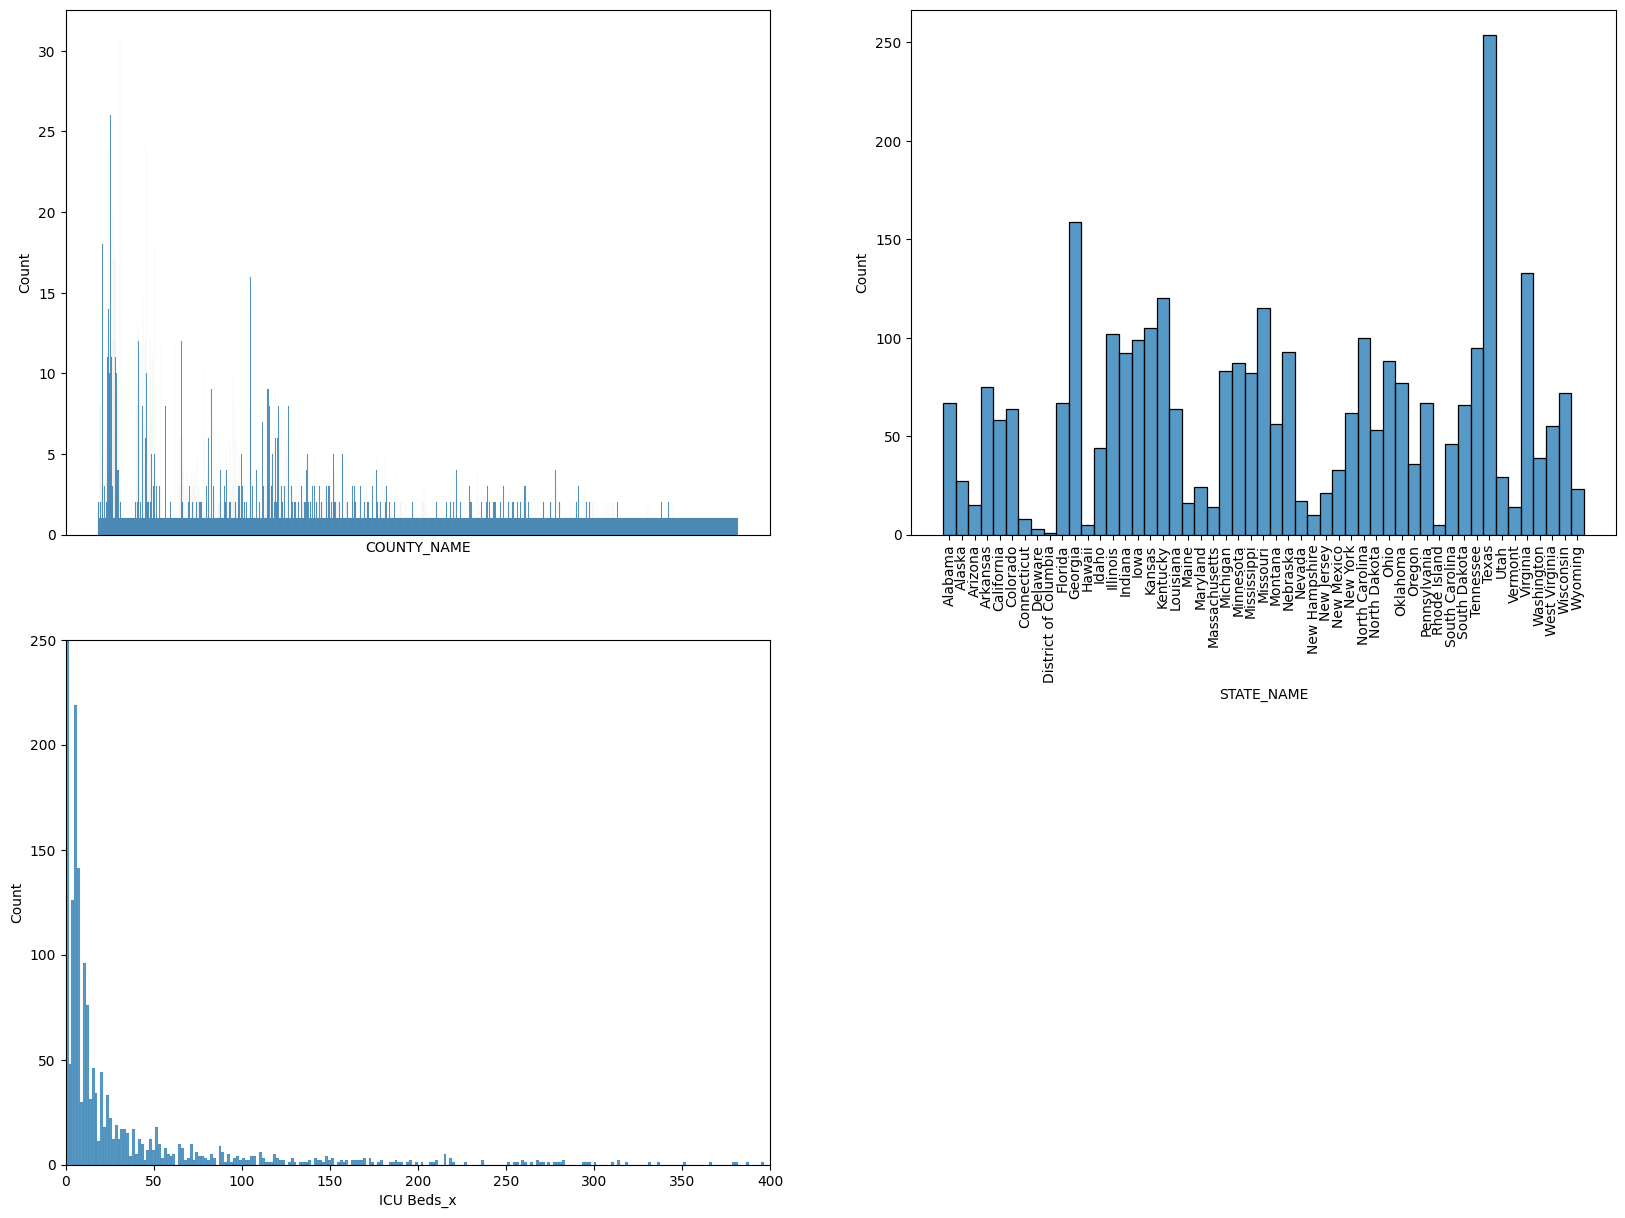

In [11]:
fig, axis = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1]})

sns.histplot(ax = axis[0,0], data = poblacion_dropped, x = "COUNTY_NAME").set_xticks([])
sns.histplot(ax = axis[0,1], data = poblacion_dropped, x = "STATE_NAME")
sns.histplot(ax = axis[1,0], data = poblacion_dropped, x = "ICU Beds_x")

axis[0, 1].tick_params(axis='x', rotation=90)

axis[1, 0].set_xlim(0, 400)
axis[1, 0].set_ylim(0, 250)


fig.delaxes(axis[1, 1])


In [12]:
poblacion_dropped.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,COUNTY_NAME,STATE_NAME,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,13.8,19.3,59338,53628,65048,25015,942,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,Autauga,Alabama,20181,15193,3345,3644,5462,1326
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.8,13.9,57588,54437,60739,90456,3393,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,Baldwin,Alabama,68790,50761,13414,14692,20520,5479
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,30.9,43.9,34382,31157,37607,7940,433,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,Barbour,Alabama,11325,8013,2159,2373,3870,887
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,21.8,27.8,46064,41283,50845,8317,344,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,Bibb,Alabama,9190,6894,1533,1789,2511,595
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,13.2,18.0,50412,46157,54667,24128,878,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,Blount,Alabama,20584,15112,4101,4661,6017,1507


Vamos a dividir las variables en grupos para graficarlas en varios mapas de calor y sacar conclusiones.

In [13]:
diseases = ['anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number']
active_specialists = ['Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
                      'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)']
specialists = ['Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)']
education_level = ['Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"]
employment_and_income = ['MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018']
rates = ['R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018']
pop_races = ['White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop']
pop_ages = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']


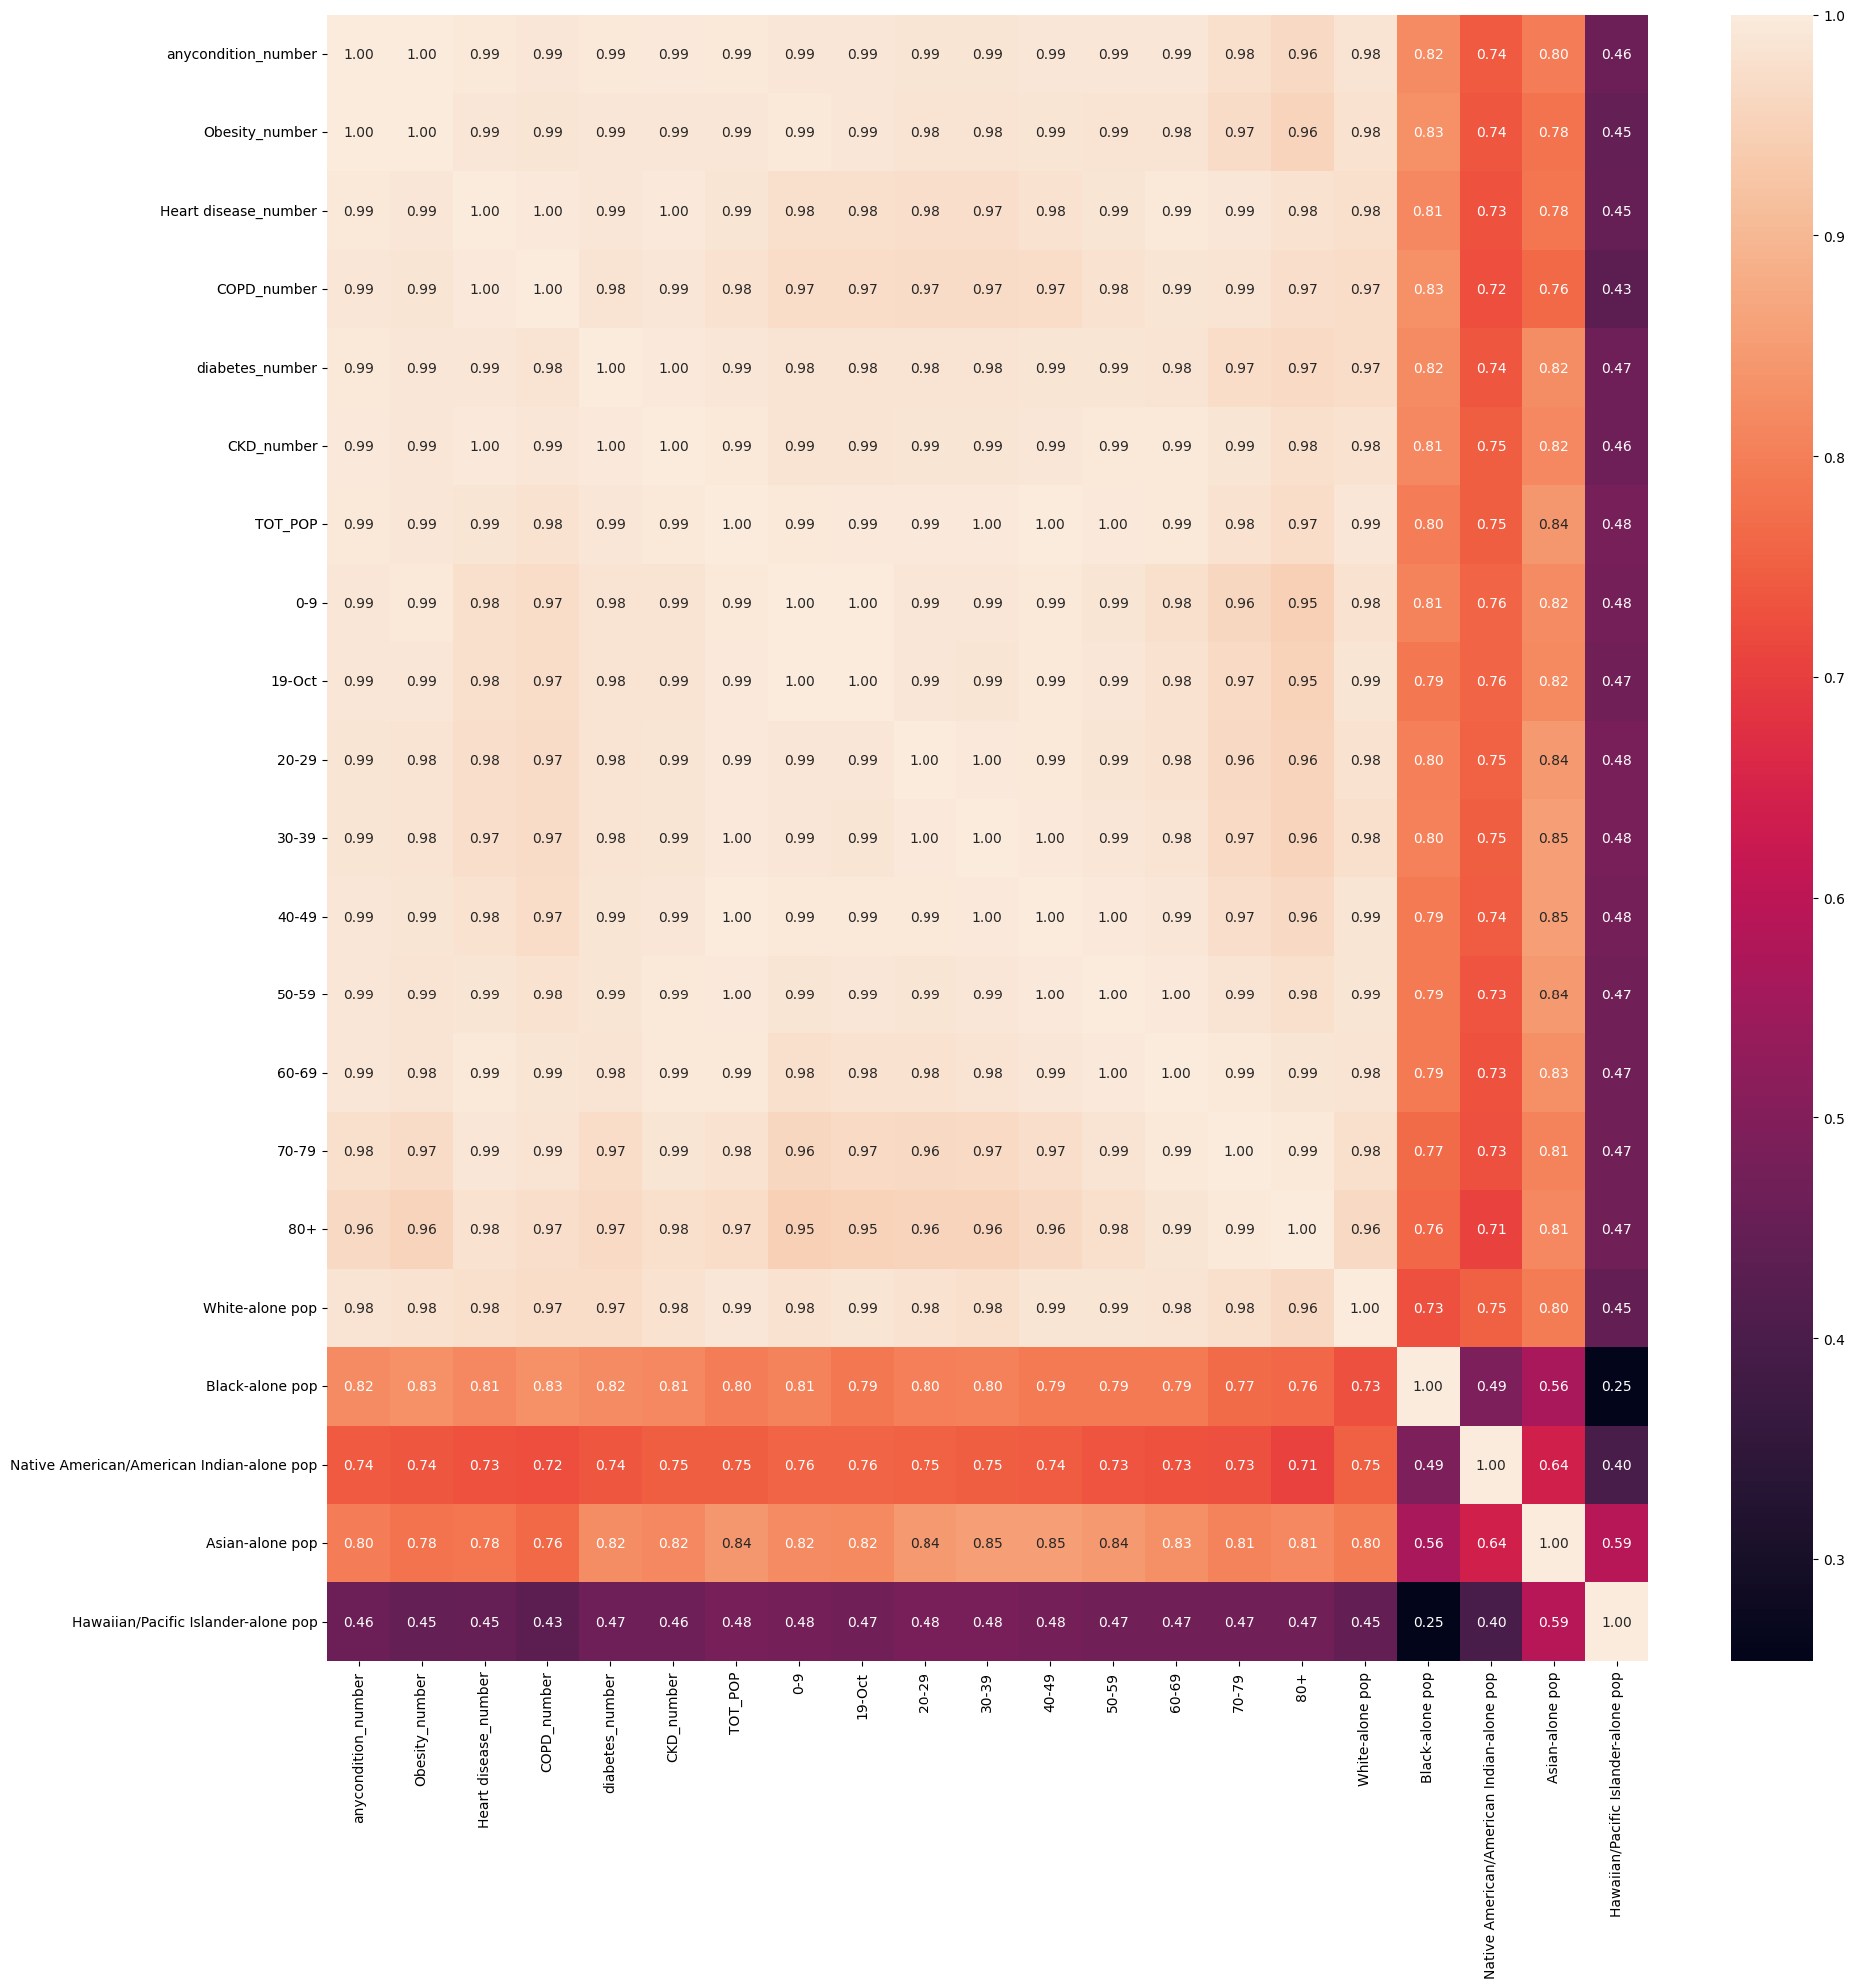

In [14]:
fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(poblacion_dropped[diseases + pop_ages + pop_races].corr(), annot = True, fmt = '.2f')

plt.tight_layout()

plt.show()

Según vemos en la gráfica:

-El envejecimiento de la población no está relacionado con el número de enfermedades crónica ya que las correlaciones son muy parecidas. Ya que los datos no reflejan una relación clara entre edad y enfermedades crónicas. Que la correlacion sea muy cercana a 1 es posible que tenga que ver con el número de total de individuos en cada población, a mayor número de personas mayor es el número de casos de una enfermedad.

-En cuanto a la etnia, vemos que la población blanca presenta mayor correlacion respecto al caso de enfermedades que el resto de etnias.

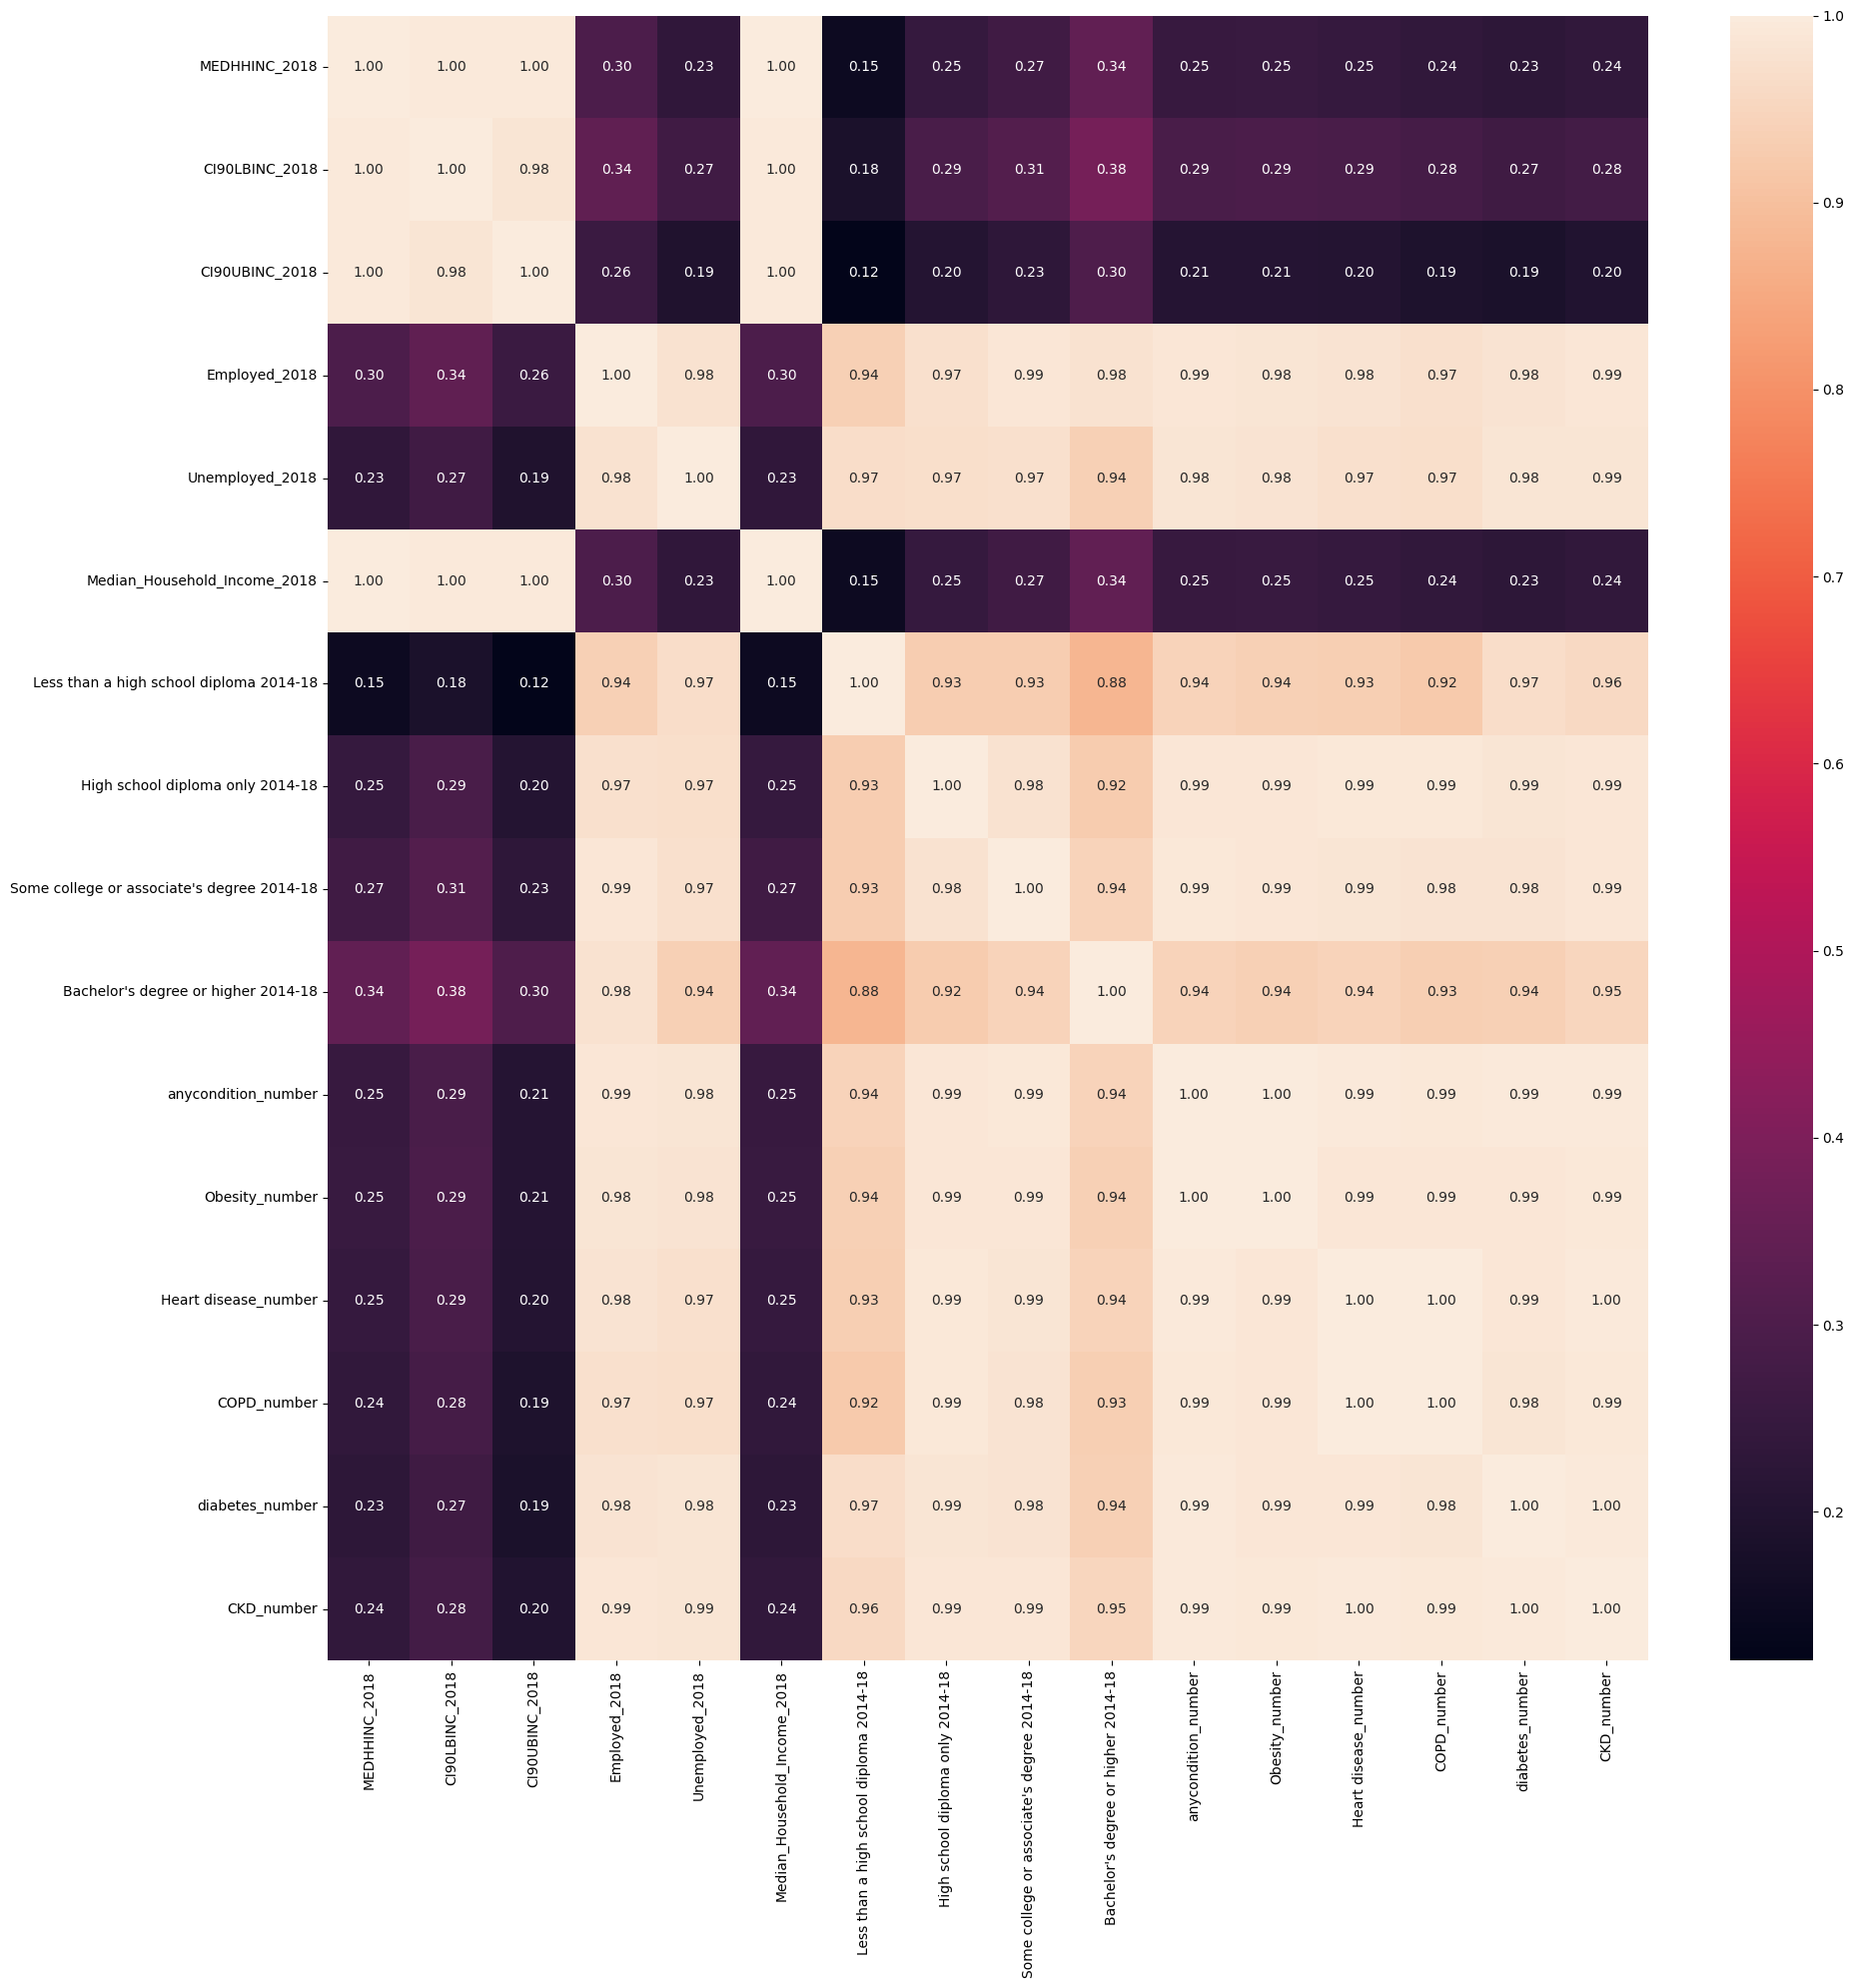

In [15]:
fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(poblacion_dropped[employment_and_income + education_level + diseases].corr(), annot = True, fmt = '.2f')

plt.tight_layout()

plt.show()

-No vemos que haya una relacion entre las variables de enfermedades y los distintos niveles educativos.

-Tampoco hay correlación entre las diferentes enfermedades y la tasa de empleo.


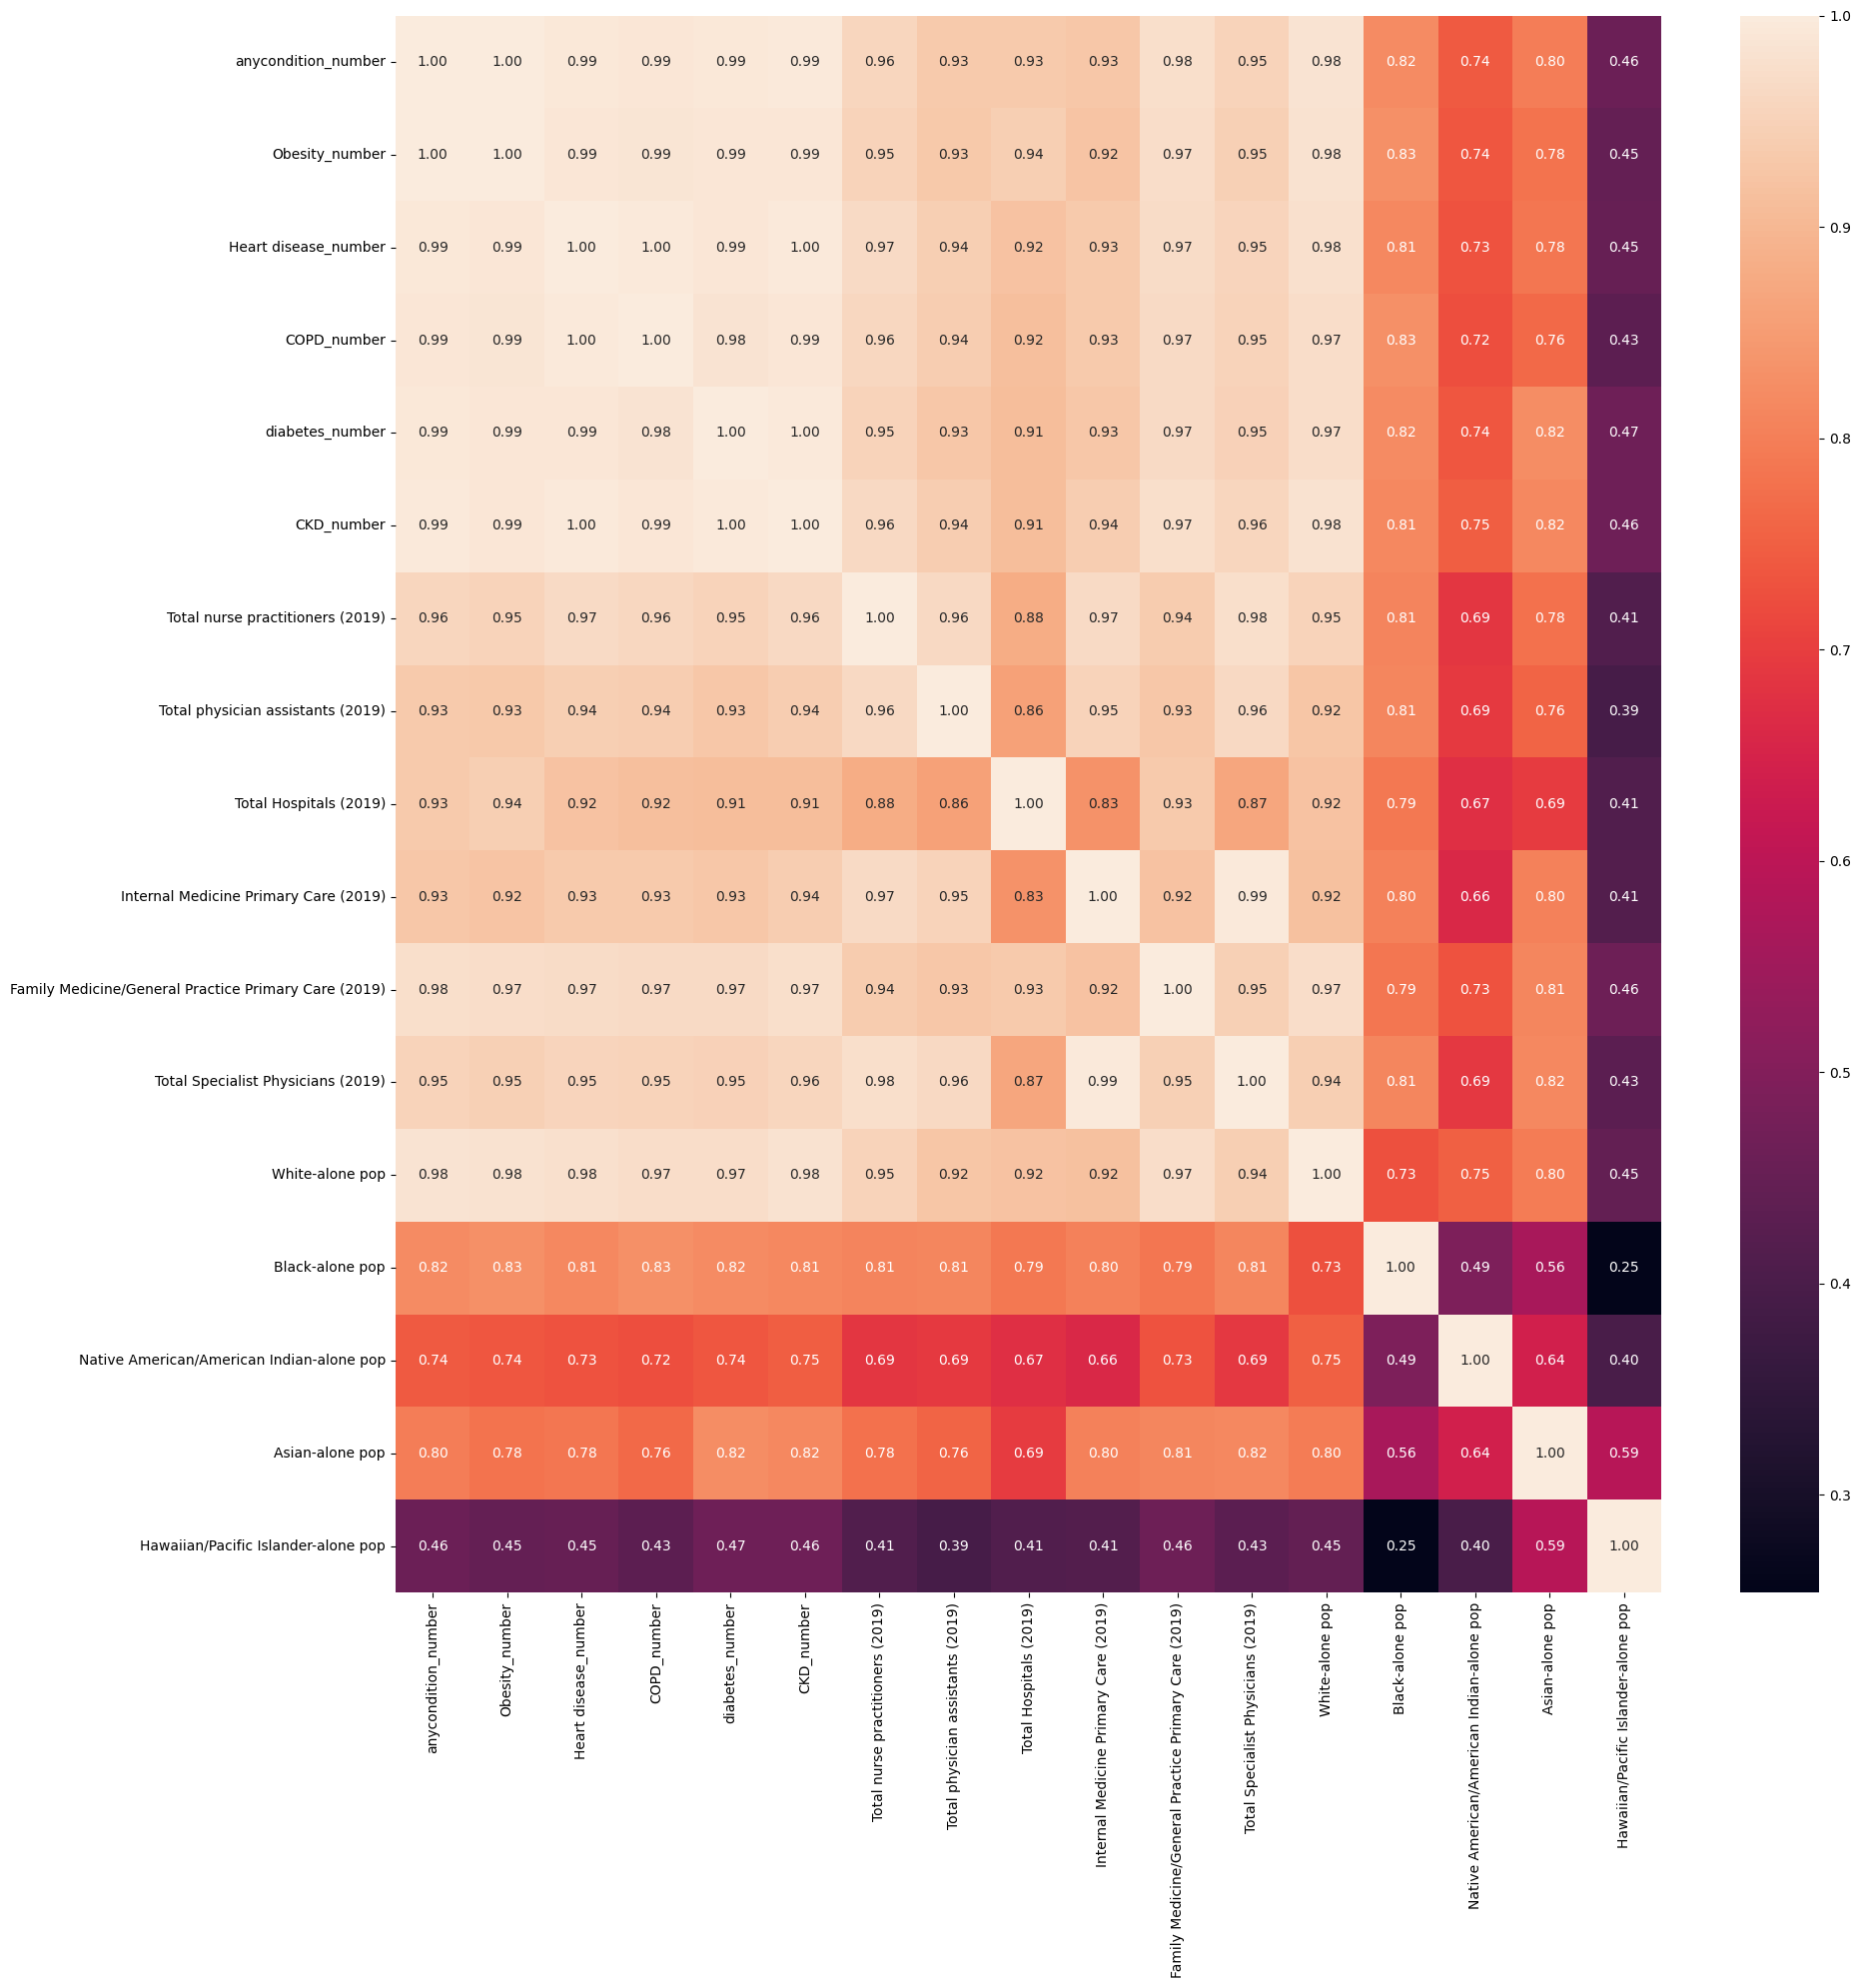

In [16]:
fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(poblacion_dropped[diseases + specialists + pop_races].corr(), annot = True, fmt = '.2f')

plt.tight_layout()

plt.show()

Al analizar la gráfica podemos decir que:

- Las enfermedades tienen una gran corrrelacion con los recursos médicos. Donde hay mayor tasa de enfermedades crónicas hay mayores recursos medicos como especialistas u hospitales.

- La población blanca parece que tiene más relación con los recursos médicos que otros grupos étnicos.

In [17]:
poblacion_dropped['county_fact'] = pd.factorize (poblacion_dropped['COUNTY_NAME']) [0]
poblacion_dropped['state_fact'] = pd.factorize (poblacion_dropped['STATE_NAME']) [0]

poblacion_fact = poblacion_dropped.drop (['COUNTY_NAME', 'STATE_NAME'], axis = 1)

poblacion_fact.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,county_fact,state_fact
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,13.8,19.3,59338,53628,65048,25015,942,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,20181,15193,3345,3644,5462,1326,0,0
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.8,13.9,57588,54437,60739,90456,3393,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,68790,50761,13414,14692,20520,5479,1,0
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,30.9,43.9,34382,31157,37607,7940,433,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,11325,8013,2159,2373,3870,887,2,0
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,21.8,27.8,46064,41283,50845,8317,344,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,9190,6894,1533,1789,2511,595,3,0
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,13.2,18.0,50412,46157,54667,24128,878,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,20584,15112,4101,4661,6017,1507,4,0


In [18]:
poblacion_fact.isnull().sum().sort_values(ascending= False)

TOT_POP                                                                          0
0-9                                                                              0
19-Oct                                                                           0
20-29                                                                            0
30-39                                                                            0
40-49                                                                            0
50-59                                                                            0
60-69                                                                            0
70-79                                                                            0
80+                                                                              0
White-alone pop                                                                  0
Black-alone pop                                                                  0
Nati

In [19]:
poblacion_fact.describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,county_fact,state_fact
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,7.965979e+04,1.395026e+04,1320.231210,6.155618e+03,254.561783,11.167739,10.365287,0.802229,1.111529,0.004108,1.116433,8.581987e+03,1.887329e+04,2.017919e+04,2.193144e+04,15.159459,21.106911,52767.083758,48594.546178,56939.621338,4.947048e+04,2005.100318,52767.083758,254.923567,226.159013,87.958758,80.074045,7.621943,6.775159,52.698009,28.215940,1.655299,62.898806,44.393892,167.332629,23.817516,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076,688.478981,26.253503
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,2.372880e+05,5.899787e+04,5362.395724,4.388798e+04,2192.079705,2.522839,2.687543,4.056710,2.166349,11.450288,11.385537,3.723815e+04,5.082858e+04,6.086391e+04,7.977484e+04,6.131874,8.909328,13907.992668,13597.996280,14323.366838,1.619570e+05,6971.115396,13907.992668,42.291759,31.542980,12.568023,10.487697,1.288832,1.126812,153.878850,86.409281,4.293436,214.737693,133.348667,543.035916,84.602028,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067,541.767733,14.260381
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-14.400000,-3.900000,-62.300000,-62.100000,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,191.300000,174.800000,65.300000,61.200000,5.600000,5.000000,0.025524,0.009726,0.001363,0.046773,0.030356,0.111759,0.000000,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000,0.000000,0.000000
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,9.008750e+03,1.420000e+02,73.000000,5.700000e+01,5.0

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

variables = list (poblacion_fact.columns)

scaled_variables = scaler.fit_transform(poblacion_fact[variables])

poblacion_scaled = pd.DataFrame(scaled_variables, index = poblacion_fact.index, columns = variables)

poblacion_scaled.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,county_fact,state_fact
0,0.005493,0.005617,0.006163,0.004417,0.004713,0.005613,0.005914,0.005724,0.007063,0.005653,0.005962,0.008830,0.001838,0.000439,0.000659,0.392027,0.438356,0.393365,0.116766,0.478360,0.476806,0.002875,0.008545,0.005879,0.004726,0.255556,0.282577,0.422690,0.395376,0.432604,0.005109,0.003928,0.422690,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.007322,0.003004,0.012513,0.004542,0.005465,0.004798,0.002822,0.007000,0.007230,0.007677,0.008379,0.005724,0.005564,0.000000,0.0
1,0.021566,0.020490,0.021719,0.015143,0.016781,0.020246,0.022950,0.029490,0.036557,0.026294,0.026607,0.015768,0.011593,0.001616,0.001552,0.348837,0.470320,0.343602,0.131737,0.657555,0.660837,0.009794,0.028637,0.025688,0.021160,0.181481,0.203514,0.410224,0.401340,0.403946,0.018474,0.014148,0.410224,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.028731,0.011794,0.049107,0.017832,0.021453,0.018834,0.023989,0.023894,0.024184,0.030836,0.033831,0.021536,0.023031,0.000543,0.0
2,0.002453,0.002261,0.002389,0.002099,0.002124,0.002274,0.002499,0.003013,0.003909,0.002942,0.001704,0.009741,0.001129,0.000073,0.000489,0.345515,0.589041,0.281991,0.131737,0.403948,0.406844,0.003352,0.004568,0.002536,0.001020,0.572222,0.642753,0.244917,0.229707,0.250106,0.001622,0.001805,0.244917,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.003273,0.001342,0.005591,0.002028,0.002441,0.002143,0.002352,0.003922,0.003808,0.004950,0.005451,0.004052,0.003718,0.001087,0.0
3,0.002208,0.002033,0.002095,0.001945,0.002065,0.002247,0.002374,0.002489,0.002999,0.002203,0.002403,0.003859,0.000675,0.000034,0.000276,0.368771,0.520548,0.334123,0.128743,0.419894,0.422053,0.001811,0.005264,0.002134,0.000833,0.403704,0.407028,0.328133,0.304362,0.338146,0.001699,0.001434,0.328133,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.002946,0.001207,0.005032,0.001825,0.002197,0.001928,0.000000,0.003180,0.003274,0.003510,0.004105,0.002625,0.002490,0.001630,0.0
4,0.005715,0.005872,0.006109,0.004330,0.004576,0.005533,0.005995,0.006847,0.008602,0.006554,0.007751,0.000769,0.002602,0.000119,0.000744,0.392027,0.520548,0.348341,0.119760,0.471526,0.472243,0.005379,0.009512,0.007395,0.002301,0.244444,0.263543,0.359106,0.340295,0.363564,0.004928,0.003661,0.359106,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.007617,0.003125,0.013017,0.004725,0.005686,0.004991,0.002822,0.007140,0.007192,0.009416,0.010722,0.006307,0.006326,0.002174,0.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = poblacion_scaled.drop('COPD_number', axis =1)
y = poblacion_scaled['COPD_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,19-Oct,40-49,50-59,60-69,70-79,80+,High school diploma only 2014-18,Some college or associate's degree 2014-18,Employed_2018,anycondition_number,Obesity_number,Heart disease_number,diabetes_number,CKD_number
0,0.002626,0.002795,0.002094,0.002923,0.003786,0.004286,0.003391,0.004505,0.003185,0.002389,0.003535,0.003768,0.004749,0.002953,0.003230
1,0.005064,0.004641,0.004352,0.006027,0.008135,0.008375,0.008218,0.013047,0.005041,0.004354,0.006687,0.006525,0.008715,0.005676,0.006103
2,0.003730,0.004130,0.003294,0.003900,0.004268,0.004728,0.004381,0.007656,0.004042,0.003318,0.004950,0.004868,0.005094,0.003872,0.003651
3,0.009094,0.010205,0.008474,0.009770,0.010619,0.011755,0.009762,0.014098,0.011861,0.008845,0.011475,0.012255,0.012597,0.008298,0.008895
4,0.013300,0.014257,0.011733,0.013758,0.016651,0.017585,0.016950,0.023362,0.017033,0.012298,0.017278,0.018522,0.019962,0.013626,0.014666


In [22]:
X_train_sel["COPD_number"] = list(y_train)
X_test_sel["COPD_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [23]:
poblacion_final = pd.concat([X_train_sel, X_test_sel])


In [24]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,19-Oct,40-49,50-59,60-69,70-79,80+,High school diploma only 2014-18,Some college or associate's degree 2014-18,Employed_2018,anycondition_number,Obesity_number,Heart disease_number,diabetes_number,CKD_number,COPD_number
0,0.002626,0.002795,0.002094,0.002923,0.003786,0.004286,0.003391,0.004505,0.003185,0.002389,0.003535,0.003768,0.004749,0.002953,0.003230,0.005315
1,0.005064,0.004641,0.004352,0.006027,0.008135,0.008375,0.008218,0.013047,0.005041,0.004354,0.006687,0.006525,0.008715,0.005676,0.006103,0.009422
2,0.003730,0.004130,0.003294,0.003900,0.004268,0.004728,0.004381,0.007656,0.004042,0.003318,0.004950,0.004868,0.005094,0.003872,0.003651,0.006416
3,0.009094,0.010205,0.008474,0.009770,0.010619,0.011755,0.009762,0.014098,0.011861,0.008845,0.011475,0.012255,0.012597,0.008298,0.008895,0.013152
4,0.013300,0.014257,0.011733,0.013758,0.016651,0.017585,0.016950,0.023362,0.017033,0.012298,0.017278,0.018522,0.019962,0.013626,0.014666,0.023026


In [25]:


X_train = train_data.drop(["COPD_number"], axis = 1)
y_train = train_data["COPD_number"]
X_test = test_data.drop(["COPD_number"], axis = 1)
y_test = test_data["COPD_number"]




In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): 4.5936906463001775e-05
Coefficients: [-0.35714861  0.01131413 -0.34073449  0.0070682   0.29078732 -0.18927399
 -0.14413186  0.15437116 -0.03617579  0.20713072  1.02599022 -0.58009896
  0.85686911 -0.39309851  0.47299493]


In [28]:
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R2 Score: ", r2)

RMSE:  0.0020733509663797426
R2 Score:  0.9909460736670564


Un RMSE de 0.0021 es extremadamente bajo, lo que sugiere que el modelo está haciendo predicciones muy precisas.

Un R2 de 0.9909 es muy cercano a 1, lo que significa que el modelo está explicando aproximadamente el 99.09% de la varianza en los datos.

Aunque el modelo es bastante preciso vamos a aplicar los modelos de regularizacion para ver si podemos afinarlo más.

In [30]:
# Vamos a comprobar como cambia el valor de R2 a medida que aumentamos el valor del hiperparámetro alpha del modelo lasso
import numpy as np
from sklearn.linear_model import Lasso

alpha_values = np.linspace(0.0001, 20.0, 20) 
r2_scores = []


for alpha in alpha_values:

    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)  
    
    y_pred_lasso = model_lasso.predict(X_test)
    
    r2 = r2_score(y_test, y_pred_lasso)
    r2_scores.append(r2)



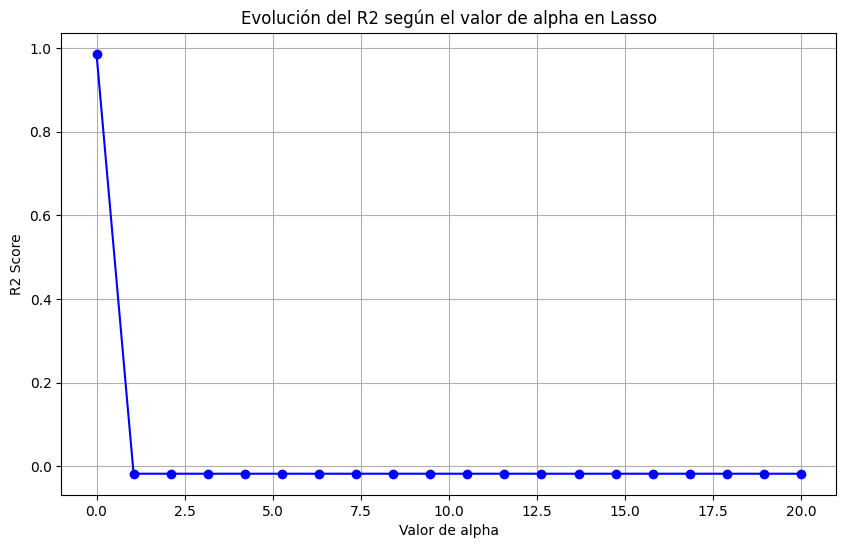

In [31]:
# Graficamos los valores de R2 en función de los valores de alpha

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Evolución del R2 según el valor de alpha en Lasso')
plt.xlabel('Valor de alpha')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

Con un alpha bajo, casi 0, la varianza de los datos (R2) es prácticamente 1, lo que puede llevar al sobreajuste del modelo predictivo. Mientras que de forma contraria, al aumentar el valor de alpha, el valor de R2 cae drásticamente a 0, lo que significa un subajuste extremo del modelo.

In [32]:
# Con el valor alpha obtenido anteriormente vamos a calcular el RMSE


reg_lasso = Lasso (alpha = 0.000001, max_iter = 4000)

reg_lasso.fit (X_train, y_train)

y_pred_lasso_final = reg_lasso.predict(X_test)

rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso_final)
r2_lasso = r2_score (y_test, y_pred_lasso_final)

print("RMSE (Lasso): ", rmse_lasso)
print("R2 (Lasso): ", r2_lasso)


RMSE (Lasso):  0.0021664005282404173
R2 (Lasso):  0.9901151788612981


Al igual que hemos hecho con la regularización Lasso vamos a ver si con la regularización Ridge podemos mejorar nuestro modelo.

In [33]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha = 0.000001, max_iter = 4000)

reg_ridge.fit(X_train, y_train)

y_pred_ridge = reg_ridge.predict(X_test)

rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("RMSE (Ridge): ", rmse_ridge)
print("R2 (Ridge): ", r2_ridge)

RMSE (Ridge):  0.002073300538093712
R2 (Ridge):  0.9909465140830225


In [34]:
# vamos a meter los valores en una grafica para compararlos

datos = {
    'Modelo': ['Regresión lineal', "Regulación Lasso", "Regulación Ridge"],
    'RMSE': [rmse, rmse_lasso, rmse_ridge],
    'R²': [r2, r2_lasso, r2_ridge]
}

df = pd.DataFrame(datos)

df

,Modelo,RMSE,R²
0,Regresión lineal,0.002073,-0.017485
1,Regulación Lasso,0.002166,0.990115
2,Regulación Ridge,0.002073,0.990947


Al tener un modelo tan preciso, ell proceso de regularzarlo apenas lo mejora, y en el caso de la regularización Lasso incluso es minimamente más baja.

In [35]:
from pickle import dump

dump (reg_ridge, open("../models/modelo_reg_ridge.sav", "wb"))

dump(reg_lasso, open("../models/modelo_reg_lasso.sav", "wb"))

dump(model, open("../models/modelo_RLinear_sin_reg.sav", "wb"))
